In [1]:
import os
if os.name != 'posix':
    %matplotlib ipympl
else:
    %matplotlib notebook
import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix

30307
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pylib.LBFGS as bfgs

colors_ = ["blue", "red", "green", "gray", "black"]

from matplotlib import ticker
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
# cmap_two_signs_= 'Greys'
# cmap_two_signs_= 'Pastel1'
# cmap_two_signs_= 'flag'
# cmap_two_signs_= 'nipy_spectral'
# cmap_two_signs_= 'jet'
# cmap_two_signs_= 'seismic'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# path_save_ = "./jupyter-notebooks/NL/results/"

In [3]:
for _ in range(30):
    plt.close()

<IPython.core.display.Javascript object>


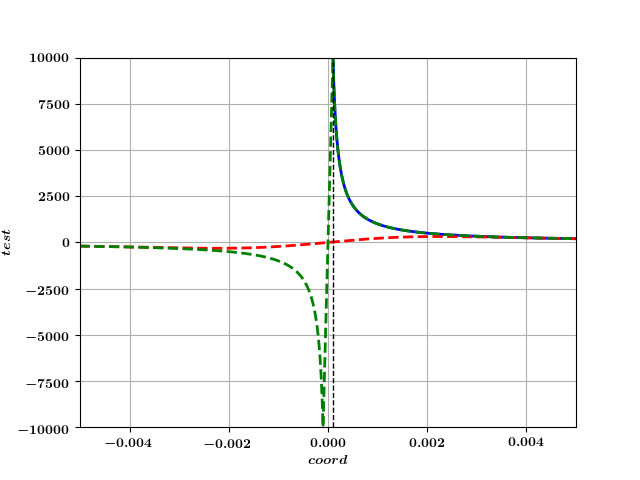

<IPython.core.display.Javascript object>


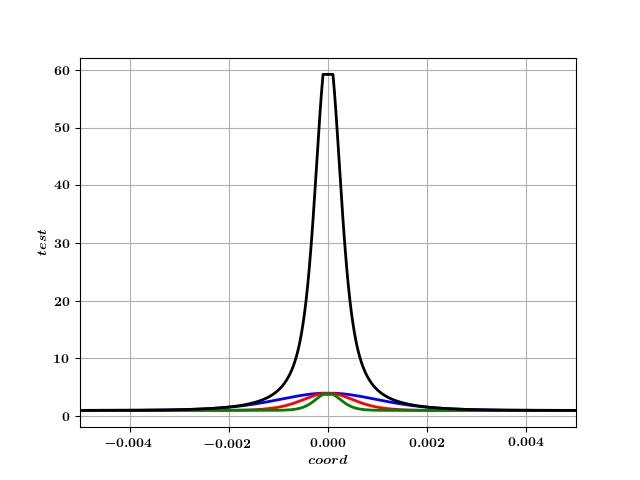

In [17]:
# --------------------------------------------------
# --- Polynomial to approximate inversion ---
# --------------------------------------------------

# Questions !!!
# > Amplitude of the transformation, it increases with a;
# > Is it possible to decompose the transformation into a product of transformation which would be easier to approximate;
# > Is it possible to decompose the transformation into a sum of transformations whihc can be encoded by LCU?

x_min = 1./10000.  # take much smaller than it is for the given kappa just for testing the transformation.
x = np.linspace(x_min, 1., 100001)
s = np.concatenate((-x[::-1], x))

# --- original approximation ---
kappa = 100.
a = 100.

pol = (1 - np.exp(-(5*kappa*s)**2)) / s
pol_a = (1 - np.exp(-(5*a*kappa*s)**2)) / s

# --- transformed transformation ---
transf = pol_a / pol

pol_new = transf * pol


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, 1./x, color='b', linewidth = 2, linestyle='-', label = "1/x")
ax.plot(s,  pol, color='r', linewidth = 2, linestyle='--',  label = "pol")
ax.plot(s,  pol_new, color='g', linewidth = 2, linestyle='--',  label = "pol-new")
ax.axvline(x = 1./kappa, color = 'black', linewidth = 1, linestyle = "-")
ax.axvline(x = 1./(a*kappa), color = 'black', linewidth = 1, linestyle = "--")
plt.xlim(-0.005, 0.005)
plt.ylim(np.min(pol_new), np.max(pol_new))
plt.xlabel('$coord$')
plt.ylabel("$test$")
plt.grid(True)
plt.show()


# fig = plt.figure()
# ax = fig.add_subplot(111)
# # ax.plot(s,  transf, color='b', linewidth = 2, linestyle='-',  label = "transformation: a = {:0.0f}".format(a))
# ax.plot(s,  (1 - np.exp(-(5*2*kappa*s)**2))/(1 - np.exp(-(5*kappa*s)**2)), 
#         color='r', linewidth = 2, linestyle='--',  label = "transformation: a = 2"
# )
# plt.xlabel('$coord$')
# plt.ylabel("$test$")
# plt.xlim(-0.005, 0.005)
# plt.grid(True)
# plt.show()



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s,  
    (1 - np.exp(-(5*2*kappa*s)**2))/(1 - np.exp(-(5*kappa*s)**2)), 
    color='b', linewidth = 2, linestyle='-',  label = "transformation: 2/1"
)
ax.plot(s,  
    (1 - np.exp(-(5*4*kappa*s)**2))/(1 - np.exp(-(5*2*kappa*s)**2)), 
    color='r', linewidth = 2, linestyle='-',  label = "transformation: 4/2"
)
ax.plot(s,  
    (1 - np.exp(-(5*8*kappa*s)**2))/(1 - np.exp(-(5*4*kappa*s)**2)), 
    color='g', linewidth = 2, linestyle='-',  label = "transformation: 8/4"
)
ax.plot(s,  
    (1 - np.exp(-(5*8*kappa*s)**2))/(1 - np.exp(-(5*kappa*s)**2)), 
    color='black', linewidth = 2, linestyle='-',  label = "transformation: 8/1"
)
plt.xlabel('$coord$')
plt.ylabel("$test$")
plt.xlim(-0.005, 0.005)
plt.grid(True)
plt.show()